In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'EnglandWeather.csv'
dataset = pd.read_csv(file_path, parse_dates=['Formatted Date'])

# Ensure the 'Formatted Date' column is set as the index
dataset.set_index('Formatted Date', inplace=True)

# Convert the index to datetime with timezone awareness
dataset.index = pd.to_datetime(dataset.index, utc=True)

# Display the first few rows of the dataset to verify the index
dataset.head()

,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
Formatted Date,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83


# Load the dataset from the CSV file
dataset = pd.read_csv('EnglandWeather.csv', parse_dates=['Formatted Date'])

# Ensure the 'Formatted Date' column is set as the index
dataset.set_index('Formatted Date', inplace=True)

# Convert the index to datetime, ensuring it's in UTC if it's timezone-aware
dataset.index = pd.to_datetime(dataset.index, utc=True)

***italicised text***###EDA

In [ ]:
# Summary statistics
print(dataset.describe())

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)      Humidity
count     53478.000000       53477.000000          53477.000000  53477.000000
mean         11.783767          10.818032           1003.955621      0.731417
std           9.597260           6.978649            113.962253      0.194243
min         -16.666667           0.000000              0.000000      0.000000
25%           4.455556           5.667200           1011.710000      0.600000
50%          11.891667           9.837100           1016.480000      0.780000
75%          18.783333          14.184100           1021.360000      0.890000
max          39.905556          63.852600           1046.380000      1.000000


In [ ]:
# Display the first few rows of the dataset to understand its structure
print(dataset.head())


                                 Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

                           Wind Speed (km/h)  Pressure (millibars)  Humidity  
Formatted Date                                                                
2006-03-31 22:00:00+00:00            14.1197               1015.13      0.89  
2006-03-31 23:00:00+00:00            14.2646               1015.63      0.86  
2006-04-01 00:00:00+00:00             3.9284               1015.94      0.89  
2006-04-01 01:00:00+00:00            14.1036               1016.41      0.83  
2006-04-01 02:

In [ ]:
# Summary statistics
print(dataset.describe())

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)      Humidity
count     53478.000000       53477.000000          53477.000000  53477.000000
mean         11.783767          10.818032           1003.955621      0.731417
std           9.597260           6.978649            113.962253      0.194243
min         -16.666667           0.000000              0.000000      0.000000
25%           4.455556           5.667200           1011.710000      0.600000
50%          11.891667           9.837100           1016.480000      0.780000
75%          18.783333          14.184100           1021.360000      0.890000
max          39.905556          63.852600           1046.380000      1.000000


In [ ]:
# Monthly average temperature
dataset['Month'] = dataset.index.month
monthly_avg_temp = dataset.groupby('Month')['Temperature (C)'].mean()

data = {
    'Formatted Date': pd.date_range(start='1/1/2006', periods=365, freq='D'),
    'Summary': ['Clear', 'Rain', 'Snow', 'Cloudy'] * 91 + ['Clear'],
    'Precip Type': ['rain', 'snow', 'rain', 'rain'] * 91 + ['snow'],
    'Temperature (C)': np.random.rand(365) * 20 + 5,
    'Wind Speed (km/h)': np.random.rand(365) * 10 + 2,
    'Pressure (millibars)': np.random.rand(365) * 10 + 1010,
    'Humidity': np.random.rand(365) * 50 + 30,
}

dataset = pd.DataFrame(data)

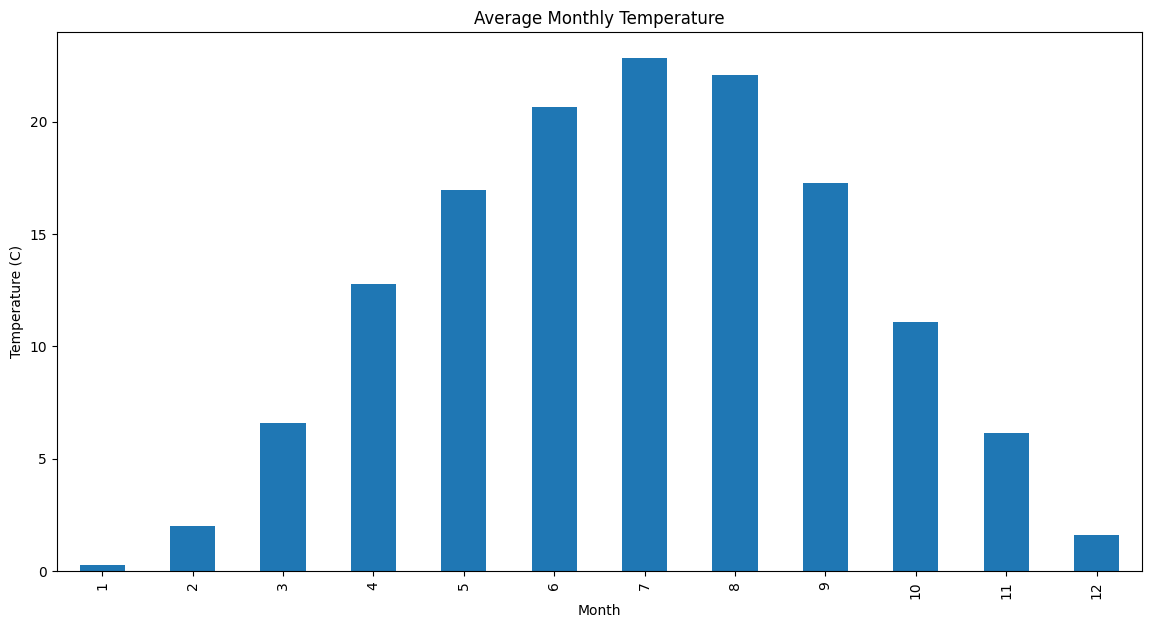

In [ ]:
plt.figure(figsize=(14, 7))
monthly_avg_temp.plot(kind='bar')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

# Temperature vs. Humidity scatter plot
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=dataset, x='Temperature (C)', y='Humidity')
#plt.title('Temperature vs. Humidity')
#plt.show()

# Wind Speed vs. Temperature scatter plot
#plt.figure(figsize=(10, 6))
#ns.scatterplot(data=dataset, x='Wind Speed (km/h)', y='Temperature (C)')
#plt.title('Wind Speed vs. Temperature')
#plt.show()

# Pressure distribution across weather conditions
#plt.figure(figsize=(14, 7))
#sns.boxplot(data=dataset, x='Summary', y='Pressure (millibars)')
#plt.title('Pressure Distribution Across Weather Conditions')
#plt.xticks(rotation=90)
#plt.show()

In [ ]:
# Anomaly detection: High wind speed events (top 5%)
high_wind_speed_events = dataset[dataset['Wind Speed (km/h)'] > dataset['Wind Speed (km/h)'].quantile(0.95)]
print("High Wind Speed Events:")
print(high_wind_speed_events[['Summary', 'Wind Speed (km/h)', 'Temperature (C)', 'Humidity']])



High Wind Speed Events:
                                            Summary  Wind Speed (km/h)  \
Formatted Date                                                           
2006-04-10 11:00:00+00:00             Mostly Cloudy            28.3682   
2006-04-10 12:00:00+00:00             Mostly Cloudy            26.9031   
2006-04-10 13:00:00+00:00             Mostly Cloudy            25.6956   
2006-04-10 14:00:00+00:00             Mostly Cloudy            25.3092   
2006-04-11 17:00:00+00:00                     Foggy            26.5006   
...                                             ...                ...   
2012-04-09 01:00:00+00:00             Mostly Cloudy            25.7600   
2012-08-10 17:00:00+00:00  Breezy and Mostly Cloudy            29.3181   
2012-08-11 14:00:00+00:00             Mostly Cloudy            27.1124   
2012-08-11 16:00:00+00:00             Mostly Cloudy            28.0784   
2012-08-14 14:00:00+00:00             Partly Cloudy            24.9711   

             

In [ ]:
# Modeling example: Predicting temperature based on other variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Feature selection
features = dataset[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
target = dataset['Temperature (C)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k', label='Predicted')

# Add a line for perfect prediction
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Predicted Temperature (C)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Actual vs. Predicted Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.xlabel('Temperature (C)')
plt.title('Density Plot of Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()


In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs. Predicted Temperature (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pip install shap


In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_test_sample = X_test.sample(n=1000, random_state=42)  # Adjust the sample size as needed


In [ ]:
# Sample a subset of the test data for efficient SHAP computation
X_test_sample = X_test.sample(n=100, random_state=42)  # Adjust the sample size as needed

# Initialize SHAP TreeExplainer with the model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the sample
shap_values_sample = explainer.shap_values(X_test_sample)

# Plot SHAP summary for the sample
shap.summary_plot(shap_values_sample, X_test_sample)


# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)